![](airindia.png)
<h1 style="text-align:center;"> Air Fare prediction Analysis</h1>

## Introduction

   **In this project,** we will predict airfare of domestic air travel in India.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Business Understanding](#0)<br>
2. [Data Understanding](#2)<br>
3. [Data Preparation](#4)<br>
4. [Modeling](#0)<br>
2. [Evaluation](#2)<br>
3. [Deployment](#4)<br>
</div>
<hr>

**CRISP-DM**(Cross-Industry Standard Process for Data Mining) is the most widely used methodology for analytics, data mining, and data science projects.

![](crisp_dm.png)

## 1. Business Understanding & Analytic Approach <a id="0"></a>
<li> What is the problem that you are trying to solve?
<li> How can you use data to answer the question?


**Business objective-** To predict airfare, as domestic air travel is popular these days in India with different air ticket booking channels, travelers are trying to make sense and understand how airlines price their tickets over time. 
We want you to explore previous airfare data and build a model to predict the price fluctuations over time so that the consumer could benefit from it. We want you to identify dependency over many endogenous variables. You are free to look at different models from the space of forecasting and regression.


**Due to Covid-19 & longtime lockdown,** availablity of seats are dificit in Air. Starvation, un-paid in private & uncertainty antilockdown are making fluctuations over time. Given historical data has not included these feautures which influence fluctuations. Model will only try to give the sense.  

## 2. Data Understanding

Import free open library pycaret  

In [1]:
import pycaret

Import pandas library for various functions as read, write, manupulation

In [2]:
import pandas as pd

Read given data by help of pandas function and assigned in variable dataframe df

In [3]:
df = pd.read_csv('C:\\Users\\Raja\\Desktop\\project\\excelr\\air_fair.csv')

Parse strings to datetime type 

In [4]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, infer_datetime_format=True)
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M')

Set InvoiceDate as index column

In [5]:
df = df.set_index(['InvoiceDate'])

In [6]:
df.head(10)

,NetFare,ProductType,ItineraryType
InvoiceDate,,,
2018-01-12 11:43,2160.00,Other Product,Domestic
2018-01-12 11:43,0.49,Other Product,Domestic
2018-01-12 13:01,6550.00,Air,Domestic
2018-01-12 13:10,6550.00,Air,Domestic
2018-11-30 14:30,5497.00,Air,Domestic
2018-01-12 14:09,4818.00,Air,Domestic
2018-11-30 14:30,1768.00,Air,Domestic
2018-01-12 13:10,7300.00,Air,Domestic
2018-11-30 17:30,7050.00,Air,Domestic


Show size of dataframe 

In [7]:
df.size

835398

Show unique value of ProductType column

In [8]:
df.ProductType.unique()

array(['Other Product', 'Air', 'Charge', 'Hotel', 'Air Cancellation',
       'Other Product Cancellation', 'payment', 'Hotel Cancellation',
       'refund', nan, 'Air Debit Note', 'Hotel Debit Note', 'Air Loss',
       'Other Product Debit Note', 'Hotel Loss'], dtype=object)

Show unique value of Itinerary column

In [9]:
df.ItineraryType.unique()

array(['Domestic', nan, 'International'], dtype=object)

Show the statistical calculations of dataframe

In [10]:
df.describe().round(2)

,NetFare
count,217576.00
mean,4266.91
std,9803.14
min,-497324.00
25%,10.00
50%,3501.00
75%,5944.00
max,497678.00


Show the general info about dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278466 entries, 2018-01-12 11:43 to 2019-10-06 22:30
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NetFare        217576 non-null  float64
 1   ProductType    278464 non-null  object 
 2   ItineraryType  245689 non-null  object 
dtypes: float64(1), object(2)
memory usage: 8.5+ MB


## 3. Data Preparation

<h4>Evaluating for Missing Data</h4>
There are two methods to detect missing data:
<ol>
 <li><b>.isnull()</b></li>
 <li><b>.notnull()</b></li>
</ol>    

Find missing value by Boolean method

In [12]:
missing_value = df.isnull()

"True" stands for missing value, while "False" stands for not missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column.</p>

In [13]:
for column in missing_value.columns.values.tolist():
    print(column)
    print (missing_value[column].value_counts())
    print("")  

NetFare
False    217576
True      60890
Name: NetFare, dtype: int64

ProductType
False    278464
True          2
Name: ProductType, dtype: int64

ItineraryType
False    245689
True      32777
Name: ItineraryType, dtype: int64



Based on the summary above, each column has 278466 rows of data, three columns containing missing data:
<ol>
    <li>"NetFare": 60890 missing data</li>
<li>"ProductType": 2 missing data</li>
<li>"ItineraryType": 32777 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
       </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"NetFare": 60890 missing data, replace them with mean</li>
    <li>"ProductType": 2 missing data, replace them with most frequent occur</li>
    <li>"ItineraryType": 32777 missing data, replace them with most frequent occur</li>
</ul>

Show data types

In [14]:
df.dtypes

NetFare          float64
ProductType       object
ItineraryType     object
dtype: object

<h4>Calculate the average of the column </h4>

In [15]:
avg_NetFare = df.NetFare.astype("float").mean(axis=0)
print("Average of NetFare:", avg_NetFare)

Average of NetFare: 4266.905212109792


#### Replace "NaN" by mean value in "NetFare" column

In [16]:
import numpy as np

In [17]:
df["NetFare"].replace(np.nan, avg_NetFare, inplace=True)

In [18]:
df.NetFare.value_counts

<bound method IndexOpsMixin.value_counts of InvoiceDate
2018-01-12 11:43    2160.00
2018-01-12 11:43       0.49
2018-01-12 13:01    6550.00
2018-01-12 13:10    6550.00
2018-11-30 14:30    5497.00
                     ...   
2019-10-06 20:45       0.00
2019-10-06 21:39    9073.00
2019-10-06 22:18    2367.00
2019-10-06 22:30    6572.00
2019-10-06 22:30    5118.00
Name: NetFare, Length: 278466, dtype: float64>

In [19]:
df.NetFare.isnull().sum()

0

#### Working with ProductType

In [20]:
df['ProductType'].value_counts()

Air                           151995
payment                        55394
Charge                         32775
Other Product                  18692
Hotel                           7904
refund                          5495
Air Cancellation                4600
Other Product Cancellation       547
Air Debit Note                   535
Hotel Cancellation               289
Air Loss                         210
Other Product Debit Note          21
Hotel Loss                         4
Hotel Debit Note                   3
Name: ProductType, dtype: int64

ProductType of most frequent is Air, So replace with Air.

We can see that Air are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [21]:
df['ProductType'].value_counts().idxmax()

'Air'

The replacement procedure is very similar to what we have seen previously

Replace the missing 'Air values by the most frequent 

In [22]:
df["ProductType"].replace(np.nan, "Air", inplace=True)

In [23]:
df['ProductType'].value_counts()

Air                           151997
payment                        55394
Charge                         32775
Other Product                  18692
Hotel                           7904
refund                          5495
Air Cancellation                4600
Other Product Cancellation       547
Air Debit Note                   535
Hotel Cancellation               289
Air Loss                         210
Other Product Debit Note          21
Hotel Loss                         4
Hotel Debit Note                   3
Name: ProductType, dtype: int64

In [24]:
df.ProductType.isnull().sum()

0

#### Working with ItineraryType

In [25]:
df['ItineraryType'].value_counts()

Domestic         225231
International     20458
Name: ItineraryType, dtype: int64

ItineraryType of most frequent is Domestic, So replace with Domestic.

We can see that Domestic are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [26]:
df['ItineraryType'].value_counts().idxmax()

'Domestic'

In [27]:
#replace the missing Domestic values by the most frequent 
df["ItineraryType"].replace(np.nan, "Domestic", inplace=True)

In [28]:
df['ItineraryType'].value_counts()

Domestic         258008
International     20458
Name: ItineraryType, dtype: int64

In [29]:
df.ItineraryType.isnull().sum()

0

In [30]:
missing_data_cleaned = df.isnull()

In [31]:
for column in missing_data_cleaned.columns.values.tolist():
    print(column)
    print (missing_data_cleaned[column].value_counts())
    print("")  

NetFare
False    278466
Name: NetFare, dtype: int64

ProductType
False    278466
Name: ProductType, dtype: int64

ItineraryType
False    278466
Name: ItineraryType, dtype: int64



<b>Good!</b> Now, we obtain the dataset with no missing values.

### Data Normalization
**Target:** would like to Normalize those variables so their value ranges from 0 to 1.<br>
**Approach:** replace original value by (original value)/(maximum value).

In [32]:
df.NetFare = df.NetFare/df.NetFare.max()
df.head().round(4)

,NetFare,ProductType,ItineraryType
InvoiceDate,,,
2018-01-12 11:43,0.0043,Other Product,Domestic
2018-01-12 11:43,0.0000,Other Product,Domestic
2018-01-12 13:01,0.0132,Air,Domestic
2018-01-12 13:10,0.0132,Air,Domestic
2018-11-30 14:30,0.0110,Air,Domestic


### Binning
**Why binning?**
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

Lets plot the histogram of NetFare, to see what the distribution of NetFare looks like.

Text(0.5, 1.0, 'NetFare bins')

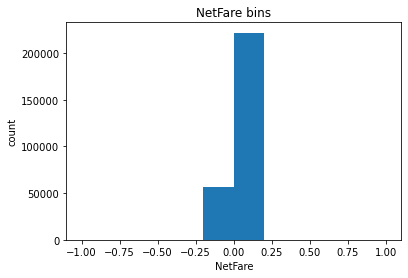

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df["NetFare"])

# set x/y labels and plot title
plt.xlabel("NetFare")
plt.ylabel("count")
plt.title("NetFare bins")

Create **bins** used to determine when one bin ends and another begins

In [34]:
bins = np.linspace(min(df["NetFare"]), max(df["NetFare"]), 7)
bins

array([-9.99288697e-01, -6.66073914e-01, -3.32859131e-01,  3.55651646e-04,
        3.33570434e-01,  6.66785217e-01,  1.00000000e+00])

We set group names:

In [35]:
group_names = ['Avg Low','Low', 'Avg Medium', 'Medium', 'High', 'Very High']

We apply the function "cut" the determine what each value of **"df.NetFare"** belongs to

In [36]:
df['NetFare-bin'] = pd.cut(df['NetFare'], bins, labels=group_names, include_lowest=True )
df[['NetFare','NetFare-bin']].tail(10).round(4)

,NetFare,NetFare-bin
InvoiceDate,,
2019-10-06 20:05,0.0451,Medium
2019-10-06 20:23,0.0024,Medium
2019-10-06 20:53,0.0075,Medium
2019-10-06 20:32,-0.0097,Avg Medium
2019-10-06 20:34,-0.0110,Avg Medium
2019-10-06 20:45,0.0000,Avg Medium
2019-10-06 21:39,0.0182,Medium
2019-10-06 22:18,0.0048,Medium
2019-10-06 22:30,0.0132,Medium


Lets see the number of **NetFare** in each bin.

In [37]:
df["NetFare-bin"].value_counts()

Medium        221928
Avg Medium     56436
High              68
Very High         23
Low                6
Avg Low            5
Name: NetFare-bin, dtype: int64

Lets plot the distribution of each bin.

Text(0.5, 1.0, 'NetFare bins')

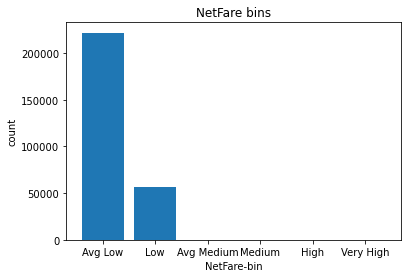

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(group_names, df["NetFare-bin"].value_counts())

# set x/y labels and plot title
plt.xlabel("NetFare-bin")
plt.ylabel("count")
plt.title("NetFare bins")

Create bar plot for ProductType

In [39]:
df['ProductType'].value_counts()

Air                           151997
payment                        55394
Charge                         32775
Other Product                  18692
Hotel                           7904
refund                          5495
Air Cancellation                4600
Other Product Cancellation       547
Air Debit Note                   535
Hotel Cancellation               289
Air Loss                         210
Other Product Debit Note          21
Hotel Loss                         4
Hotel Debit Note                   3
Name: ProductType, dtype: int64

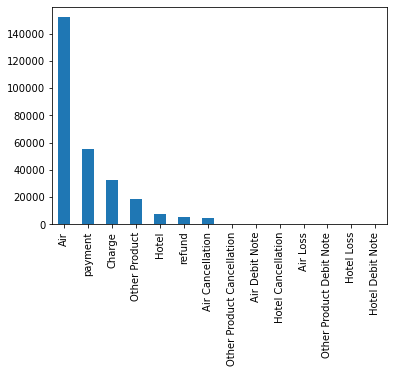

In [40]:
df['ProductType'].value_counts().plot(kind='bar')

Create bar plot of ItineraryType ( Domestic, International)

In [41]:
df['ItineraryType'].value_counts()

Domestic         258008
International     20458
Name: ItineraryType, dtype: int64

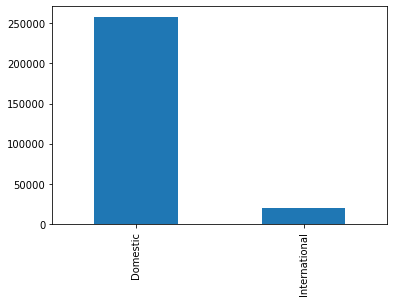

In [42]:
df['ItineraryType'].value_counts().plot(kind='bar')

In [43]:
df=df.drop(['NetFare-bin'], axis=1, inplace=True)

In [44]:
dummy_variable_1 = pd.get_dummies(df["ProductType"])
dummy_variable_1.head()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
### Setting up Environment

In [ ]:
from pycaret.regression import *
env= setup(data = df, target = 'NetFare')

## 4. Modeling

### Create Model

Create lenear model

In [ ]:
lr = create_model('lr')

Create ridge model

In [ ]:
ridge=create_model('ridge')

Create Least Angle Regression model

In [ ]:
lar=create_model('lar')

###  Tune Model

Tuned model of Lenear regression

In [ ]:
tuned_lr = tune_model('lr')
tuned_lr

Tuned model of ridge regression

In [ ]:
tuned_ridge = tune_model('ridge')
tuned_ridge

Tuned model of Least Angle Regression regression

In [ ]:
tuned_lar = tune_model('lar')
tuned_lar

### Model Ensembling

Combined model of all tuned

In [ ]:
blender = blend_models(estimator_list = [lr, ridge, lar])
blender

### Model Analysis

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are over 10 plots available, please see the plot_model() docstring for the list of available plots.

#### 4.1 Residual Plot

In [ ]:
plot_model(tuned_lr)

#### 4.2 Recursive Feat. Selection

In [ ]:
plot_model(tuned_ridge, plot='rfe')

#### 4.3 Prediction Error Plot

In [ ]:
plot_model(tuned_lar, plot = 'error')

#### 4.4 Feature Importance Plot

In [ ]:
plot_model(tuned_lar, plot = 'feature')